In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

In [4]:
def convert_true_distribution(y_train):  #making y_train and y_test into 10 x m  Matrix
    y = np.empty([len(y_train),10],dtype = int)
    for i in range(len(y_train)):
        a = y_train[i]
        b = np.zeros(10,dtype = int) 
        b[a] = 1
        y[i] = b
    return y.T

In [5]:
Y_train = convert_true_distribution(y_train)
Y_test = convert_true_distribution(y_test)

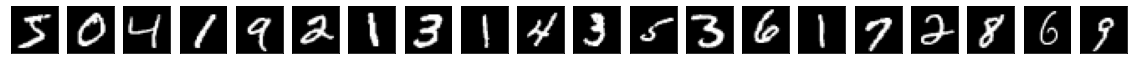

In [7]:
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

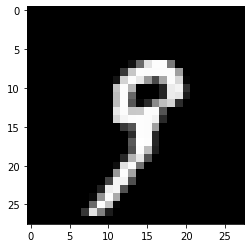

In [8]:
X_train = x_train.astype('float32') / 255.
X_test = x_test.astype('float32') / 255.
plt.imshow(X_train[19].reshape(28,28))

In [9]:
X_train = X_train.T
X_test = X_test.T

In [10]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [11]:
def initialize_param(d):
    np.random.seed(3)
    w = np.random.randn(10,d)/np.sqrt(d)
    b = np.zeros(10)
    params = {"w": w,"b": b}
    return params

In [12]:
def forward(X,params):
    W = params["w"]
    b = params["b"]
    Z = np.dot(W,X)+np.vstack(b)
    A = softmax(Z)
    return A

In [13]:
def softmax(Z):
    A = np.empty(Z.shape)
    for i in range(Z.shape[1]):
        expZ = np.exp(Z[:,i]-np.max(Z[:,i]))
        A[:,i] = expZ / expZ.sum(axis=0,keepdims=True)
    return A

In [14]:
def compute_cost(A,Y):
    m = Y.shape[1]
    cost_arr = np.empty((m))
    for i in range(m):
        cost_arr[i] = np.sum(Y[:,i] * np.log(A[:,i]))
    cost = (-1/m) * np.sum(cost_arr)
    return cost

In [15]:
def backprop(X,Y,A):
    m = X.shape[1]
    dw = (1/m) * np.dot((A-Y),X.T)
    db = (1/m) * np.sum((A-Y),axis=1)
    return dw,db

In [16]:
def optimize(params, X, Y, num_iterations, l_rate):
    w = params["w"]
    b = params["b"]

    costs = []
    for i in range(num_iterations):
        A = forward(X,params)
        cost = compute_cost(A,Y)
        dw,db = backprop(X,Y,A)

        params["w"] = params["w"] - l_rate * dw 
        params["b"] = params["b"] - l_rate * db
        
        if((i+1)%100==0):
            print("Cost on {0} iteration: {1} {2} {3}".format((i+1),cost,np.linalg.norm(dw),np.linalg.norm(db)))
        
        costs.append(cost)
    return params,costs

In [17]:
def predict(params,X,Y,dataset):
    count=0
    m = X.shape[1]
    w = params["w"]
    print(w.shape,X.shape)
    b = params["b"]
    m = X.shape[1]
    A = softmax(np.dot(w,X) + np.vstack(b))
    A[A>0.5]=1
    A[A<0.5]=0
    for i in range(m):
        if((A[:,i]==Y[:,i]).all()):
            count+=1
    acc =(count/m)*100
    print('{} Accuracy : {:.2f} %'.format(dataset,acc))
    return A

In [18]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
    params = initialize_param(d)
    print(params["w"].shape)
    params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
    return params,costs

In [19]:
params,costs = model(784, X_train, Y_train, X_test, Y_test, 2000, 0.075)

(10, 784)
Cost on 100 iteration: 0.6822477723864373 0.18704666591804273 0.014031295459832368
Cost on 200 iteration: 0.5351422089743556 0.10491885957245053 0.01087427711792821
Cost on 300 iteration: 0.47548830247684587 0.07505754400713661 0.009427299906303551
Cost on 400 iteration: 0.4415166144139538 0.05936155700231113 0.008516473283518311
Cost on 500 iteration: 0.41895359192515136 0.04958843186790338 0.00785810107021437
Cost on 600 iteration: 0.40258217868011537 0.042872728353208704 0.007344958384203934
Cost on 700 iteration: 0.39000082287121185 0.03794935828359923 0.006926008157482664
Cost on 800 iteration: 0.3799347120916396 0.03417069613455594 0.006573121967054326
Cost on 900 iteration: 0.3716377132963893 0.03116977350873656 0.006269143400039315
Cost on 1000 iteration: 0.36464079543256755 0.02872260891387743 0.006002813571335967
Cost on 1100 iteration: 0.35863256871177357 0.0266844879332267 0.0057663304410520136
Cost on 1200 iteration: 0.3533971831978445 0.024957601513697598 0.0055

In [20]:
Y_hat_train = predict(params,X_train,Y_train,'Train')
Y_hat_test = predict(params,X_test,Y_test,'Test')

(10, 784) (784, 60000)
Train Accuracy : 88.10 %
(10, 784) (784, 10000)
Test Accuracy : 88.65 %


In [21]:
print(params['w'].shape)
print(params['b'].shape)

(10, 784)
(10,)


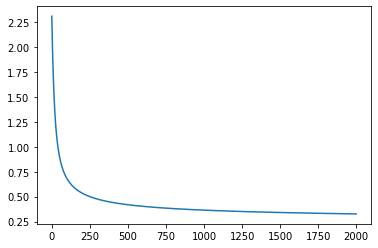

In [22]:
plt.plot(range(len(costs)),costs)